<a href="https://colab.research.google.com/github/Dulavinya/Tea_defect_detection/blob/main/Leaf_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 3. Install Ultralytics ###
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/Leaves_detection.zip'

!unzip -q "{zip_path}" -d ./FER

In [4]:

import os

# after unzip
data_dir = "./FER/train"  # adjust if needed

# get all class folders inside the dataset
classes = sorted(os.listdir(data_dir))
print(classes)

# create dictionary with index → class_name
dict_classes = {i: name for i, name in enumerate(classes)}
print(dict_classes)

# update dict (convert numbers if folder names are numeric)
updated_dict = {k: int(v) if v.isdigit() else v for k, v in dict_classes.items()}
print(updated_dict)


['images', 'labels']
{0: 'images', 1: 'labels'}
{0: 'images', 1: 'labels'}


In [5]:
!pip install pyyaml


In [6]:
import yaml



file_path = './FER/data.yaml'
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['leaves'], 'roboflow': {'workspace': 'children-and-adults-detection', 'project': 'leaves-detection-taesc', 'version': 2, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/children-and-adults-detection/leaves-detection-taesc/dataset/2'}}


In [7]:

classes=data["names"]
print(classes)

['leaves']


In [8]:


dict_classes={}
for i, j in enumerate(classes):
  dict_classes[i]=j
print(dict_classes)


updated_dict = {key: int(value) if value.isdigit() else value for key, value in dict_classes.items()}

print(updated_dict)


{0: 'leaves'}
{0: 'leaves'}


In [9]:


%%writefile './FER/leaves_config.yaml'

path: './FER' # dataset root dir
train: train # train images (relative to 'path')
val: valid  # val images (relative to 'path')

names:
  0: 'leaves'


Writing ./FER/leaves_config.yaml


In [10]:
### 2. Define root directory ###
root_dir= './FER'

In [11]:
import torch
torch.cuda.is_available()  # should now return True
torch.cuda.device_count()  # should return 1


1

In [12]:
### 4. Train model ###

import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8s.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(root_dir, "leaves_config.yaml"), epochs=100,imgsz=640,patience=50,batch=0.70,device=0)  # train the model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=0.7, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./FER/leaves_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line

In [16]:


from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print(metrics.box.map)  # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps) # a list contains map50-95 of each category

Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1435.0±294.9 MB/s, size: 44.2 KB)
val: Scanning /content/FER/valid/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 51056.7it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.2it/s 3.1s
                   all        100         99       0.99          1      0.995      0.995
Speed: 2.4ms preprocess, 14.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
0.9949
0.9949
0.9949
[     0.9949]


In [17]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Customize validation settings
validation_results = model.val(data=os.path.join(root_dir, "leaves_config.yaml"), imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1833.3±392.7 MB/s, size: 41.5 KB)
val: Scanning /content/FER/valid/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 222982.7it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.8it/s 2.5s
                   all        100         99       0.99          1      0.995      0.995
Speed: 2.2ms preprocess, 11.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val2


In [18]:
print("validation_results map50:", validation_results.box.map50)

validation_results map50: 0.9949



Found https://t3.ftcdn.net/jpg/06/11/24/66/360_F_611246666_UuaYs1qQuJllipq03mHE8o3Szd8D8uCV.jpg locally at 360_F_611246666_UuaYs1qQuJllipq03mHE8o3Szd8D8uCV.jpg
image 1/1 /content/360_F_611246666_UuaYs1qQuJllipq03mHE8o3Szd8D8uCV.jpg: 512x640 1 leaves, 13.7ms
Speed: 2.2ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
[[15.197110176086426, 61.09771728515625, 469.5622253417969, 306.2554626464844, 0.9633842706680298, 0.0]]


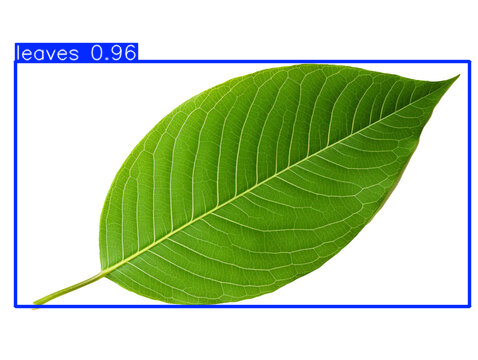

In [19]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.pt")  # pretrained YOLOv8n model
#model = YOLO("yolov8n.pt")
model_path="/content/runs/detect/train/weights/best.pt"

# Load a model
model = YOLO(model_path)  # load a custom model

# Run batched inference on a list of images
results = model("https://t3.ftcdn.net/jpg/06/11/24/66/360_F_611246666_UuaYs1qQuJllipq03mHE8o3Szd8D8uCV.jpg")  # return a generator of Results objects


# Process results generator
for result in results:
    predict_out = result.boxes.data.tolist()
    print(predict_out)  # Boxes object for bounding box outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk




image 1/1 /content/set-tropical-leaves-isolated-on-260nw-1938430966.jpg: 480x640 8 leavess, 56.4ms
Speed: 2.3ms preprocess, 56.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[[77.44453430175781, 8.15288257598877, 172.49851989746094, 128.7846221923828, 0.9595432281494141, 0.0], [15.011554718017578, 11.056005477905273, 66.48851776123047, 129.34140014648438, 0.9318667054176331, 0.0], [16.034849166870117, 143.26287841796875, 89.09159088134766, 253.47645568847656, 0.9280170798301697, 0.0], [69.22537994384766, 10.634763717651367, 133.71487426757812, 128.49989318847656, 0.8911343216896057, 0.0], [99.86119842529297, 144.76194763183594, 145.03475952148438, 253.5499267578125, 0.8228298425674438, 0.0], [315.43450927734375, 156.5172119140625, 385.1942443847656, 252.87879943847656, 0.5796515941619873, 0.0], [151.63873291015625, 151.1664581298828, 226.0254364013672, 255.0790252685547, 0.5673084259033203, 0.0], [141.5013885498047, 7.214198112487793, 175.42320251464844, 130.1383

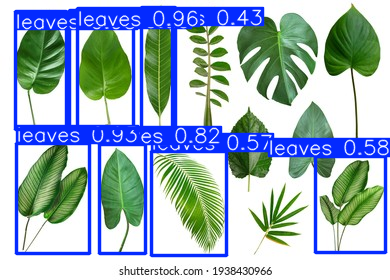

In [20]:



results = model("https://www.shutterstock.com/image-photo/set-tropical-leaves-isolated-on-260nw-1938430966.jpg")


# Process results generator
for result in results:
    predict_out = result.boxes.data.tolist()
    print(predict_out)  # Boxes object for bounding box outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


In [21]:
### 5. Copy results ###
import subprocess

# Set environment variables and run the scp command

command = "scp -r /content/runs/detect/train7 '/content/drive/MyDrive/Work_space/Project/Harvest_pro/function1/models/leaves detection'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

1